In [16]:
!pip install imblearn 

  Running setup.py bdist_wheel for imbalanced-learn: started
  Running setup.py bdist_wheel for imbalanced-learn: finished with status 'done'
  Stored in directory: C:\Users\Admin\AppData\Local\pip\Cache\wheels\94\6c\0c\d7254937a767ff72814aa542997d0e889bed37c1d31ba3de1a
Successfully built imbalanced-learn


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as sklm 
import sklearn.decomposition as skdc
import numpy as np
from sklearn.svm import SVC
import sklearn.pipeline as skpl 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
train = pd.read_csv("exoTrain.csv")
test = pd.read_csv("exoTest.csv")

In [3]:
train.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [4]:
train.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,1.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,1.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,1.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,1.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,1.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,2.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


In [5]:
test.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84


In [10]:
test.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,...,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,1.008772,515.411351,738.046404,532.603246,739.618088,530.949807,729.591491,517.421404,720.723544,481.015211,...,60.027754,307.682825,88.976842,301.299895,105.121684,291.509561,256.656789,121.810035,224.806035,133.954544
std,0.093329,12592.950138,12622.940170,12545.065255,12591.933126,12512.976544,12572.187328,12454.094432,12525.496793,12397.610716,...,9528.594808,9588.586341,9497.373179,9611.024800,9611.076529,9654.581767,9362.719825,9487.642217,9483.948248,9700.731923
min,1.000000,-59421.000000,-14663.430000,-56580.000000,-10817.590000,-54545.000000,-7744.500000,-53580.000000,-6373.400000,-53832.000000,...,-89126.500000,-89432.070000,-89759.940000,-90182.630000,-90225.760000,-90595.000000,-86719.070000,-86911.500000,-87123.260000,-87476.940000
25%,1.000000,-22.230000,-22.912500,-22.985000,-18.662500,-20.980000,-21.245000,-22.675000,-22.200000,-22.685000,...,-9.602500,-12.842500,-15.222500,-14.350000,-17.370000,-18.272500,-24.000000,-27.360000,-36.855000,-29.475000
50%,1.000000,1.195000,0.410000,-1.125000,-0.880000,-1.495000,-2.650000,-4.330000,-3.910000,-3.890000,...,3.585000,3.795000,4.785000,3.910000,5.575000,7.150000,-4.385000,-4.995000,-5.135000,-3.785000
75%,1.000000,98.317500,89.710000,89.827500,73.257500,66.947500,45.147500,38.850000,37.150000,30.670000,...,23.445000,20.472500,25.582500,28.767500,27.455000,35.810000,17.755000,11.745000,12.265000,13.205000
max,2.000000,290882.500000,290653.500000,290554.000000,290486.500000,290289.000000,289982.500000,289197.500000,288520.500000,287404.500000,...,198420.000000,197888.500000,199639.000000,202007.000000,203730.500000,205924.000000,203193.000000,205050.000000,206884.500000,211488.500000


In [11]:
(train.isna().sum()).sum()

0

In [12]:
(train.isnull().sum()).sum()

0

In [25]:
(test.isna().sum()).sum()

0

In [26]:
(test.isnull().sum()).sum()

0

In [3]:
train.LABEL.replace((2, 1), (1, 0), inplace=True)

In [4]:
test.LABEL.replace((2, 1), (1, 0), inplace=True)

In [7]:
train.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,1,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,1,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,1,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [8]:
test.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,1,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,1,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,1,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,1,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84


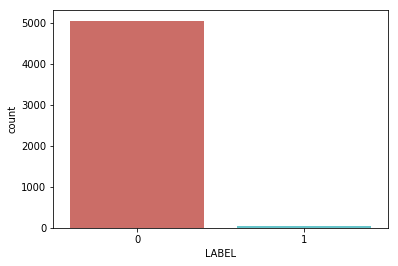

In [47]:
sns.countplot(x='LABEL',data=train, palette='hls')

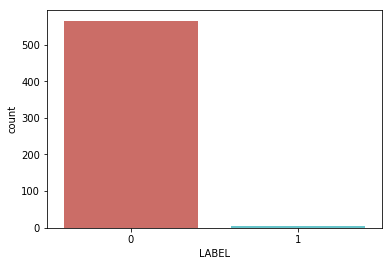

In [48]:
sns.countplot(x='LABEL',data=test, palette='hls')

In [5]:
means = train.mean(axis=1)
train['mean'] = means

In [6]:
std = train.iloc[:, 1:3198].std(axis=1)
train['std'] = std

In [7]:
std = test.iloc[:, 1:3198].std(axis=1)
test['std'] = std

In [23]:
train.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,1,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,1,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,1,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [40]:
test.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197,std
0,1,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72,29.816465
1,1,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72,1645.019108
2,1,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63,117.076869
3,1,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41,394.506774
4,1,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84,177.043008


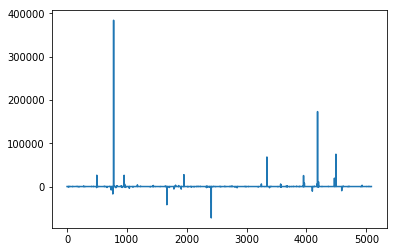

In [34]:
train["mean"].plot()

In [28]:
test.shape
#X_train = train.drop('LABEL',axis=1)
y_train = train["LABEL"]
print(X_train.shape)
print(y_train.shape)

(5087, 3197)
(5087L,)


ValueError: x and y must be the same size

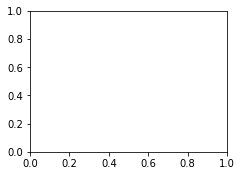

In [29]:
fig = plt.figure(figsize=(12,40))
x = np.array(range(3197))
for i in range(37):
    ax = fig.add_subplot(13,3,i+1)
    ax.scatter(X_train,train[train.LABEL==1].iloc[i,:])

## Regresion Logistica

### Usando como predictor la desviación estándar

In [8]:
X_train = train.iloc[:, 1:50]
X_test = test.iloc[:, 1:50]
#X_train = train["std"]
#X_test = test["std"]
y_train = train["LABEL"]
y_test = test["LABEL"]

In [82]:
len(X_train)

5087

In [125]:
est = smf.Logit(y_train, X_train).fit()
est.summary2()

Optimization terminated successfully.
         Current function value: 0.674387
         Iterations 11


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: -14.662  
Dependent Variable: LABEL            AIC:              6959.2119
Date:               2019-04-23 09:21 BIC:              7279.3996
No. Observations:   5087             Log-Likelihood:   -3430.6  
Df Model:           48               LL-Null:          -219.04  
Df Residuals:       5038             LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     11.0000                                     
-----------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-----------------------------------------------------------------
FLUX.1       -0.0022    0.0004  -5.3361  0.0000  -0.0031  -0.0014
FLUX.2        0.0030    0.0005   5.5919  0.0000   0.0019   0.0040
FLUX.3       -0.0012    0.0005  -2.2883  0.0221  -0.0022  -0.0002
FLUX.4        0.0014    0.0007   2.1444  0.0320   0.0001   0.0027
FLUX.5       -0.0013    0.0006  -2.0028  0.0452  -0.0025  -0.0000
FLUX.6        0.0000    0.0006   0.0267  0.9787  -0.0011   0.0011
FLUX.7        0.0002    0.0006   0.3871  0.6987  -0.0010   0.0014
FLUX.8        0.0012    0.0006   2.0086  0.0446   0.0000   0.0023
FLUX.9       -0.0010    0.0007  -1.3942  0.1633  -0.0024   0.0004
FLUX.10      -0.0009    0.0007  -1.2902  0.1970  -0.0022   0.0005
FLUX.11       0.0012    0.0006   1.8912  0.0586  -0.0000   0.0024
FLUX.12      -0.0014    0.0006  -2.3845  0.0171  -0.0026  -0.0002
FLUX.13      -0.0003    0.0007  -0.4608  0.6450  -0.0017   0.0010
FLUX.14       0.0036    0.0007   4.9742  0.0000   0.0022   0.0050
FLUX.15      -0.0034    0.0008  -4.3996  0.0000  -0.0049  -0.0019
FLUX.16       0.0012    0.0007   1.7922  0.0731  -0.0001   0.0025
FLUX.17      -0.0019    0.0005  -3.4613  0.0005  -0.0030  -0.0008
FLUX.18       0.0028    0.0007   4.1377  0.0000   0.0014   0.0041
FLUX.19       0.0001    0.0007   0.1574  0.8749  -0.0013   0.0015
FLUX.20      -0.0010    0.0005  -1.9479  0.0514  -0.0020   0.0000
FLUX.21      -0.0004    0.0003  -1.4628  0.1435  -0.0011   0.0002
FLUX.22       0.0003    0.0004   0.5961  0.5511  -0.0006   0.0011
FLUX.23      -0.0001    0.0004  -0.2356  0.8138  -0.0009   0.0007
FLUX.24      -0.0000    0.0006  -0.0395  0.9685  -0.0012   0.0011
FLUX.25       0.0003    0.0006   0.3957  0.6923  -0.0010   0.0015
FLUX.26      -0.0000    0.0004  -0.1137  0.9095  -0.0009   0.0008
FLUX.27      -0.0005    0.0003  -1.5479  0.1216  -0.0011   0.0001
FLUX.28       0.0014    0.0006   2.3168  0.0205   0.0002   0.0026
FLUX.29      -0.0004    0.0005  -0.8413  0.4002  -0.0015   0.0006
FLUX.30      -0.0009    0.0003  -2.5988  0.0094  -0.0015  -0.0002
FLUX.31       0.0004    0.0002   2.2992  0.0215   0.0001   0.0008
FLUX.32      -0.0000    0.0001  -0.2245  0.8224  -0.0002   0.0002
FLUX.33      -0.0008    0.0003  -2.7678  0.0056  -0.0014  -0.0002
FLUX.34       0.0012    0.0006   1.9355  0.0529  -0.0000   0.0024
FLUX.35      -0.0007    0.0006  -1.0969  0.2727  -0.0019   0.0005
FLUX.36      -0.0006    0.0006  -1.1147  0.2650  -0.0018   0.0005
FLUX.37       0.0026    0.0005   5.0585  0.0000   0.0016   0.0036
FLUX.38      -0.0016    0.0005  -3.0044  0.0027  -0.0026  -0.0006
FLUX.39      -0.0008    0.0006  -1.2844  0.1990  -0.0020   0.0004
FLUX.40       0.0009    0.0007   1.3343  0.1821  -0.0004   0.0022
FLUX.41      -0.0015    0.0008  -1.9106  0.0561  -0.0031   0.0000
FLUX.42       0.0031    0.0007   4.6190  0.0000   0.0018   0.0044
FLUX.43      -0.0024    0.0006  -3.8015  0.0001  -0.0036  -0.0011
FLUX.44       0.0004    0.0005   0.6898  0.4903  -0.0007   0.0014
FLUX.45      -0.0009    0.0004  -2.1815  0.0291  -0.0017  -0.0001
FLUX.46       0.0021    0.0005   3.8665  0.0001   0.0010   0.0032
FLUX.47      -0.0006    0.0006  -0.9655  0.3343  -0.0017   0.0006
FLUX.48      -0.0007    0.

In [120]:
coefficients = est.params
coefficients

FLUX.1    -0.002240
FLUX.2     0.002991
FLUX.3    -0.001160
FLUX.4     0.001421
FLUX.5    -0.001259
FLUX.6     0.000015
FLUX.7     0.000235
FLUX.8     0.001185
FLUX.9    -0.001001
FLUX.10   -0.000887
FLUX.11    0.001196
FLUX.12   -0.001403
FLUX.13   -0.000322
FLUX.14    0.003577
FLUX.15   -0.003360
FLUX.16    0.001209
FLUX.17   -0.001896
FLUX.18    0.002753
FLUX.19    0.000111
FLUX.20   -0.001015
FLUX.21   -0.000450
FLUX.22    0.000259
FLUX.23   -0.000095
FLUX.24   -0.000023
FLUX.25    0.000254
FLUX.26   -0.000047
FLUX.27   -0.000507
FLUX.28    0.001414
FLUX.29   -0.000445
FLUX.30   -0.000878
FLUX.31    0.000445
FLUX.32   -0.000022
FLUX.33   -0.000790
FLUX.34    0.001168
FLUX.35   -0.000680
FLUX.36   -0.000650
FLUX.37    0.002583
FLUX.38   -0.001600
FLUX.39   -0.000776
FLUX.40    0.000876
FLUX.41   -0.001518
FLUX.42    0.003089
FLUX.43   -0.002367
FLUX.44    0.000375
FLUX.45   -0.000902
FLUX.46    0.002122
FLUX.47   -0.000562
FLUX.48   -0.000720
FLUX.49    0.000296
dtype: float64

In [126]:
y_pred_test = est.predict(X_test)
print("error : {:.2f}".format(100*(1-sum(y_test==y_pred_test)/len(y_test))), "%")

('error : 100.00', '%')


In [147]:
y_pred_test

0      0.537442
1      0.623716
2      0.595455
3      0.409483
4      0.567845
5      0.500171
6      0.477183
7      0.503364
8      0.646890
9      0.553025
10     0.492398
11     0.513876
12     0.490576
13     0.510223
14     0.484395
15     0.493574
16     0.481673
17     0.515580
18     0.501251
19     0.516362
20     0.504035
21     0.391590
22     0.504342
23     0.528388
24     0.502170
25     0.449875
26     0.502233
27     0.418082
28     0.441150
29     0.508081
         ...   
540    0.506311
541    0.489693
542    0.492343
543    0.490867
544    0.420875
545    0.524502
546    0.490555
547    0.508524
548    0.507825
549    0.539763
550    0.427349
551    0.511497
552    0.491493
553    0.525802
554    0.500275
555    0.512604
556    0.531735
557    0.496833
558    0.507680
559    0.503319
560    0.498749
561    0.491742
562    0.478025
563    0.501807
564    0.471242
565    0.415609
566    0.485740
567    0.491015
568    0.470547
569    0.333532
Length: 570, dtype: floa

### Prueba con los primeros 50 flujos de luz

In [9]:
X_train = train.iloc[:, 1:50]
X_test = test.iloc[:, 1:50]
#X_train = train["std"]
#X_test = test["std"]
y_train = train["LABEL"]
y_test = test["LABEL"]

In [10]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Admin\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.64


In [12]:
confusion_matrix(y_test.tolist(), y_pred.tolist())

array([[360, 205],
       [  2,   3]], dtype=int64)

### feature importance y oversampling

In [5]:
X_train = train.iloc[:, 1:50]
X_test = test.iloc[:, 1:50]
#X_train = train["std"]
#X_test = test["std"]
y_train = train["LABEL"]
y_test = test["LABEL"]

### SMOTE oversampling

In [6]:
sm = SMOTE(random_state=42)
X_smote_train, y_smote = sm.fit_resample(X_train, y_train)
pd.Series(y_smote).value_counts()

1    5050
0    5050
dtype: int64

In [7]:
X_smote_train = pd.DataFrame(X_smote_train)
X_smote_train.columns = X_train.columns

y_smote = pd.DataFrame(data=y_smote, columns=['y'])

In [8]:
logreg = LogisticRegression()
logreg.fit(X_smote_train, y_smote)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

C:\Users\Admin\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression classifier on test set: 0.46


C:\Users\Admin\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [9]:
y_actual = pd.Series(y_test, name = "Actual")
y_predicted = pd.Series(y_pred, name = "Predicho")

y_actual = y_actual.replace([0,1],["No","Si"])
y_predicho = y_predicted.replace([0,1],["No","Si"])
pd.crosstab(y_actual, y_predicho, margins=True)

Predicho,No,Si,All
Actual,,,
No,261,304,565
Si,3,2,5
All,264,306,570


### Recursive Feature Elimination RFE

In [10]:
logreg = LogisticRegression()

rfe = RFE(logreg, 5, step=1)
rfe = rfe.fit(X_smote_train, y_smote.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Admin\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Admin\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Admin\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Admin\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Admin\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True  True  True False False False False False False
 False False False False False False False False False  True False False
 False]
[31 15 25 36 24 33 43 39 29 41 35 22 20  9 17 27 40  7 34 37 38 42 16 23
  8 12  1  1  1  1 14 13 21 44  5 45 19 11  4 32 26  3 30  2 18  1 10  6
 28]


In [62]:
X_new_train = X_smote_train.iloc[:, 27:31]
y_new_train = y_smote['y']

### Solo Feature Selection RFE

In [63]:
X_new_train = X_train.iloc[:, 27:31]
X_new_test = X_test.iloc[:, 27:31]
logreg = LogisticRegression()
logreg.fit(X_new_train, y_train)
y_pred = logreg.predict(X_new_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_new_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.99


In [64]:
y_actual = pd.Series(y_test, name = "Actual")
y_predicted = pd.Series(y_pred, name = "Predicho")

y_actual = y_actual.replace([0,1],["No","Si"])
y_predicho = y_predicted.replace([0,1],["No","Si"])
pd.crosstab(y_actual, y_predicho, margins=True)

Predicho,No,All
Actual,,
No,565,565
Si,5,5
All,570,570


### Con penalizacion

##### Usando sag solver y penalizacion l2

In [65]:
X_new_train = X_train.iloc[:, 27:31]
X_new_test = X_test.iloc[:, 27:31]
logreg = LogisticRegression(solver='lg', penalty='l2')
logreg.fit(X_new_train, y_train)
y_pred = logreg.predict(X_new_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_new_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.53


C:\Users\Admin\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [32]:
y_actual = pd.Series(y_test, name = "Actual")
y_predicted = pd.Series(y_pred, name = "Predicho")

y_actual = y_actual.replace([0,1],["No","Si"])
y_predicho = y_predicted.replace([0,1],["No","Si"])
pd.crosstab(y_actual, y_predicho, margins=True)

Predicho,No,Si,All
Actual,,,
No,299,266,565
Si,3,2,5
All,302,268,570


##### Usando saga solver y penalizacion l2

In [76]:
X_new_train = X_train.iloc[:, 27:31]
X_new_test = X_test.iloc[:, 27:31]
logreg = LogisticRegression(solver='saga', penalty='l2')
logreg.fit(X_new_train, y_train)
y_pred = logreg.predict(X_new_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_new_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.53


C:\Users\Admin\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [77]:
y_actual = pd.Series(y_test, name = "Actual")
y_predicted = pd.Series(y_pred, name = "Predicho")

y_actual = y_actual.replace([0,1],["No","Si"])
y_predicho = y_predicted.replace([0,1],["No","Si"])
pd.crosstab(y_actual, y_predicho, margins=True)

Predicho,No,Si,All
Actual,,,
No,302,263,565
Si,3,2,5
All,305,265,570


## PCA y Regresion logistica


In [38]:
X_train = train.iloc[:, 1:3198]
X_test = test.iloc[:, 1:3198]
y_train = train["LABEL"]
y_test = test["LABEL"]

In [39]:
pca = skdc.PCA()
pc = pca.fit_transform(X_train, y_train)


In [98]:
var_explained = pca.explained_variance_ratio_ 
print(pd.Series(var_explained))


0       5.435289e-01
1       1.576792e-01
2       1.089686e-01
3       5.310155e-02
4       5.135426e-02
5       1.852569e-02
6       1.427272e-02
7       1.338228e-02
8       1.044143e-02
9       6.862476e-03
10      5.948178e-03
11      3.863733e-03
12      2.586211e-03
13      1.616898e-03
14      1.100061e-03
15      7.288486e-04
16      5.951435e-04
17      5.245787e-04
18      3.498080e-04
19      3.371119e-04
20      3.133841e-04
21      2.905568e-04
22      2.637147e-04
23      2.524921e-04
24      2.424707e-04
25      2.295419e-04
26      2.254891e-04
27      2.197740e-04
28      1.987973e-04
29      1.869569e-04
            ...     
3167    5.066718e-12
3168    5.025755e-12
3169    4.975917e-12
3170    4.938607e-12
3171    4.907987e-12
3172    4.851340e-12
3173    4.816115e-12
3174    4.795198e-12
3175    4.760524e-12
3176    4.706295e-12
3177    4.650835e-12
3178    4.639733e-12
3179    4.614899e-12
3180    4.531802e-12
3181    4.506506e-12
3182    4.468242e-12
3183    4.414

In [40]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

pca = skdc.PCA(n_components = 30) #only include first 10 components
pc = pca.fit(X_train, y_train)
X_train_pca = pc.transform(X_train)
X_test_pca = pc.transform(X_test)

logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(X_train_pca, y_train)


C:\Users\Admin\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
y_pred = logisticRegr.predict(X_test_pca)

In [42]:
logisticRegr.score(X_test_pca, y_test)

0.887719298245614

In [43]:
y_actual = pd.Series(y_test, name = "Actual")
y_predicted = pd.Series(y_pred, name = "Predicho")

y_actual = y_actual.replace([0,1],["No","Si"])
y_predicho = y_predicted.replace([0,1],["No","Si"])


In [44]:
pd.crosstab(y_actual, y_predicho, margins=True)



Predicho,No,Si,All
Actual,,,
No,504,61,565
Si,3,2,5
All,507,63,570


### Con penalizacion

In [49]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

pca = skdc.PCA(n_components = 30) #only include first 10 components
pc = pca.fit(X_train, y_train)
X_train_pca = pc.transform(X_train)
X_test_pca = pc.transform(X_test)

logisticRegr = LogisticRegression(solver = 'saga', penalty="l2")

logisticRegr.fit(X_train_pca, y_train)
y_pred = logisticRegr.predict(X_test_pca)
logisticRegr.score(X_test_pca, y_test)

C:\Users\Admin\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.05087719298245614

In [50]:
y_actual = pd.Series(y_test, name = "Actual")
y_predicted = pd.Series(y_pred, name = "Predicho")

y_actual = y_actual.replace([0,1],["No","Si"])
y_predicho = y_predicted.replace([0,1],["No","Si"])
pd.crosstab(y_actual, y_predicho, margins=True)

Predicho,No,Si,All
Actual,,,
No,26,539,565
Si,2,3,5
All,28,542,570


## Tunning de componentes principales seleccionados

#### Principal components = 50


In [40]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

pca = skdc.PCA(n_components = 50) #only include first 10 components
pc = pca.fit(X_train, y_train)
X_train_pca = pc.transform(X_train)
X_test_pca = pc.transform(X_test)

logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(X_train_pca, y_train)
y_pred = logisticRegr.predict(X_test_pca)
logisticRegr.score(X_test_pca, y_test)

C:\Users\Admin\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9017543859649123

In [41]:
y_actual = pd.Series(y_test, name = "Actual")
y_predicted = pd.Series(y_pred, name = "Predicho")

y_actual = y_actual.replace([0,1],["No","Si"])
y_predicho = y_predicted.replace([0,1],["No","Si"])
pd.crosstab(y_actual, y_predicho, margins=True)



Predicho,No,Si,All
Actual,,,
No,511,54,565
Si,2,3,5
All,513,57,570


#### Principal components = 100


In [42]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

pca = skdc.PCA(n_components = 100) #only include first 10 components
pc = pca.fit(X_train, y_train)
X_train_pca = pc.transform(X_train)
X_test_pca = pc.transform(X_test)

logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(X_train_pca, y_train)
y_pred = logisticRegr.predict(X_test_pca)
logisticRegr.score(X_test_pca, y_test)

C:\Users\Admin\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9140350877192982

In [43]:
y_actual = pd.Series(y_test, name = "Actual")
y_predicted = pd.Series(y_pred, name = "Predicho")

y_actual = y_actual.replace([0,1],["No","Si"])
y_predicho = y_predicted.replace([0,1],["No","Si"])
pd.crosstab(y_actual, y_predicho, margins=True)


Predicho,No,Si,All
Actual,,,
No,519,46,565
Si,3,2,5
All,522,48,570


#### Principal components = 150

In [51]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

pca = skdc.PCA(n_components = 200) #only include first 10 components
pc = pca.fit(X_train, y_train)
X_train_pca = pc.transform(X_train)
X_test_pca = pc.transform(X_test)

logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(X_train_pca, y_train)
y_pred = logisticRegr.predict(X_test_pca)
logisticRegr.score(X_test_pca, y_test)

C:\Users\Admin\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9157894736842105

In [52]:
y_actual = pd.Series(y_test, name = "Actual")
y_predicted = pd.Series(y_pred, name = "Predicho")

y_actual = y_actual.replace([0,1],["No","Si"])
y_predicho = y_predicted.replace([0,1],["No","Si"])
pd.crosstab(y_actual, y_predicho, margins=True)

Predicho,No,Si,All
Actual,,,
No,519,46,565
Si,2,3,5
All,521,49,570


###### con regularizacion

In [60]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

pca = skdc.PCA(n_components = 200) #only include first 10 components
pc = pca.fit(X_train, y_train)
X_train_pca = pc.transform(X_train)
X_test_pca = pc.transform(X_test)

logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(X_train_pca, y_train)
y_pred = logisticRegr.predict(X_test_pca)
logisticRegr.score(X_test_pca, y_test)

C:\Users\Admin\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9228070175438596

In [61]:
y_actual = pd.Series(y_test, name = "Actual")
y_predicted = pd.Series(y_pred, name = "Predicho")

y_actual = y_actual.replace([0,1],["No","Si"])
y_predicho = y_predicted.replace([0,1],["No","Si"])
pd.crosstab(y_actual, y_predicho, margins=True)

Predicho,No,Si,All
Actual,,,
No,523,42,565
Si,2,3,5
All,525,45,570


#### saga solver

In [81]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

pca = skdc.PCA(n_components = 200) #only include first 10 components
pc = pca.fit(X_train, y_train)
X_train_pca = pc.transform(X_train)
X_test_pca = pc.transform(X_test)

logisticRegr = LogisticRegression(solver = 'saga', penalty='l1')

logisticRegr.fit(X_train_pca, y_train)
y_pred = logisticRegr.predict(X_test_pca)
logisticRegr.score(X_test_pca, y_test)

C:\Users\Admin\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.10350877192982456

In [82]:
y_actual = pd.Series(y_test, name = "Actual")
y_predicted = pd.Series(y_pred, name = "Predicho")

y_actual = y_actual.replace([0,1],["No","Si"])
y_predicho = y_predicted.replace([0,1],["No","Si"])
pd.crosstab(y_actual, y_predicho, margins=True)

Predicho,No,Si,All
Actual,,,
No,56,509,565
Si,2,3,5
All,58,512,570


#### Principal components = 300

In [83]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

pca = skdc.PCA(n_components = 300) #only include first 10 components
pc = pca.fit(X_train, y_train)
X_train_pca = pc.transform(X_train)
X_test_pca = pc.transform(X_test)

logisticRegr = LogisticRegression(solver = 'lbfgs', penalty='l2')

logisticRegr.fit(X_train_pca, y_train)
y_pred = logisticRegr.predict(X_test_pca)
logisticRegr.score(X_test_pca, y_test)

C:\Users\Admin\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9140350877192982

In [84]:
y_actual = pd.Series(y_test, name = "Actual")
y_predicted = pd.Series(y_pred, name = "Predicho")

y_actual = y_actual.replace([0,1],["No","Si"])
y_predicho = y_predicted.replace([0,1],["No","Si"])
pd.crosstab(y_actual, y_predicho, margins=True)

Predicho,No,Si,All
Actual,,,
No,518,47,565
Si,2,3,5
All,520,50,570


##### saga solver

In [86]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

pca = skdc.PCA(n_components = 300) #only include first 10 components
pc = pca.fit(X_train, y_train)
X_train_pca = pc.transform(X_train)
X_test_pca = pc.transform(X_test)

logisticRegr = LogisticRegression(solver = 'saga', penalty='l2')

logisticRegr.fit(X_train_pca, y_train)
y_pred = logisticRegr.predict(X_test_pca)
logisticRegr.score(X_test_pca, y_test)

C:\Users\Admin\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.06140350877192982

In [87]:
y_actual = pd.Series(y_test, name = "Actual")
y_predicted = pd.Series(y_pred, name = "Predicho")

y_actual = y_actual.replace([0,1],["No","Si"])
y_predicho = y_predicted.replace([0,1],["No","Si"])
pd.crosstab(y_actual, y_predicho, margins=True)

Predicho,No,Si,All
Actual,,,
No,31,534,565
Si,1,4,5
All,32,538,570


## SVM 

In [98]:
X_train = train.iloc[:, 1:3198]
X_test = test.iloc[:, 1:3198]
y_train = train["LABEL"]
y_test = test["LABEL"]

In [101]:
clf = SVC(gamma='scale')
clf.fit(X_train, y_train) 
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [102]:
clf.score(X_train, y_train)

0.9948889325732259

In [103]:
clf.score(X_test, y_test)

0.9912280701754386

In [105]:
y_pred= clf.predict(X_test)

In [106]:
y_actual = pd.Series(y_test, name = "Actual")
y_predicted = pd.Series(y_pred, name = "Predicho")

y_actual = y_actual.replace([0,1],["No","Si"])
y_predicho = y_predicted.replace([0,1],["No","Si"])
pd.crosstab(y_actual, y_predicho, margins=True)

Predicho,No,All
Actual,,
No,565,565
Si,5,5
All,570,570


### SVM modelo 2

In [107]:
clf = SVC(gamma='scale')
clf.fit(X_train, y_train) 
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.5, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [108]:
print('train score:', clf.score(X_train, y_train))
print('test score:', clf.score(X_test, y_test))
y_pred= clf.predict(X_test)

('train score:', 0.9948889325732259)
('test score:', 0.9912280701754386)


In [109]:
y_actual = pd.Series(y_test, name = "Actual")
y_predicted = pd.Series(y_pred, name = "Predicho")

y_actual = y_actual.replace([0,1],["No","Si"])
y_predicho = y_predicted.replace([0,1],["No","Si"])
pd.crosstab(y_actual, y_predicho, margins=True)

Predicho,No,All
Actual,,
No,565,565
Si,5,5
All,570,570


### SVM modelo 3

In [122]:
clf = SVC(gamma='scale')
clf.fit(X_train, y_train) 
SVC(C=2, cache_size=200, class_weight={1: 10}, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.7, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC(C=2, cache_size=200, class_weight={1: 10}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.7, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [123]:
print('train score:', clf.score(X_train, y_train))
print('test score:', clf.score(X_test, y_test))
y_pred= clf.predict(X_test)

('train score:', 0.9948889325732259)
('test score:', 0.9912280701754386)


In [124]:
y_actual = pd.Series(y_test, name = "Actual")
y_predicted = pd.Series(y_pred, name = "Predicho")

y_actual = y_actual.replace([0,1],["No","Si"])
y_predicho = y_predicted.replace([0,1],["No","Si"])
pd.crosstab(y_actual, y_predicho, margins=True)

Predicho,No,All
Actual,,
No,565,565
Si,5,5
All,570,570
